In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [63]:
file_path = "Датасет №1_Airline Passenger Satisfaction_mod.csv"
df = pd.read_csv(file_path)

Что можно сделать:
1. Бублик с соотношением loyal и disloyal клиентов (классно разделить по полу еще)
2. Диаграмма по классу
3. График полетов по дням (по дням, потому что все полеты были совершены в октябре 2022)
4. Бублик с соотношением типов поездки


Первичный анализ данных

In [64]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Date
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3.0,...,4,3.0,4.0,4,5,5,25,18.0,neutral or dissatisfied,2022-10-20
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3.0,...,1,5.0,3.0,1,4,1,1,6.0,neutral or dissatisfied,2022-10-08
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2.0,...,4,3.0,4.0,4,4,5,0,0.0,satisfied,2022-10-11
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5.0,...,2,5.0,3.0,1,4,2,11,9.0,neutral or dissatisfied,2022-10-25
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3.0,...,3,4.0,4.0,3,3,3,0,0.0,satisfied,2022-10-23


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103910 entries, 0 to 103909
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103910 non-null  int64  
 1   Gender                             103858 non-null  object 
 2   Customer Type                      103910 non-null  object 
 3   Age                                103910 non-null  int64  
 4   Type of Travel                     103910 non-null  object 
 5   Class                              103910 non-null  object 
 6   Flight Distance                    103910 non-null  int64  
 7   Inflight wifi service              103910 non-null  int64  
 8   Departure/Arrival time convenient  103910 non-null  int64  
 9   Ease of Online booking             103792 non-null  float64
 10  Gate location                      103910 non-null  int64  
 11  Food and drink                     1039

Проверка нулевых значений

In [66]:
print(df.isnull().sum())

id                                      0
Gender                                 52
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                118
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                     3315
Baggage handling                      510
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Minutes              0
Arrival Delay in Minutes              310
satisfaction                      

Очистка данных

In [77]:
df.fillna({'Gender': df['Gender'].mode()}, inplace=True)

In [78]:
df.fillna({'Ease of Online booking': df['Ease of Online booking'].mean()}, inplace=True)

In [79]:
df.fillna({'Leg room service': df['Leg room service'].mean()}, inplace=True)

In [80]:
df.fillna({'Baggage handling': df['Baggage handling'].mean()}, inplace=True)

In [81]:
df.fillna({'Arrival Delay in Minutes': df['Arrival Delay in Minutes'].mean()}, inplace=True)

Проверка на выбросы

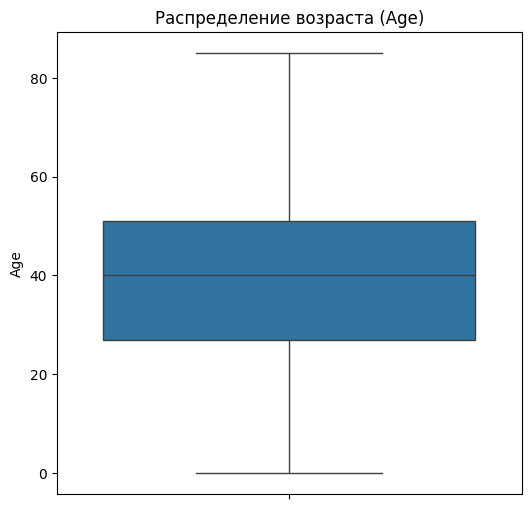

In [82]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Age'])
plt.title("Распределение возраста (Age)")

plt.show()

Удаление выбросов
(Сделала до заполнения пустых значений (пункт выше), после этого удаление выбросов уже и не нужно)

In [83]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'Age')

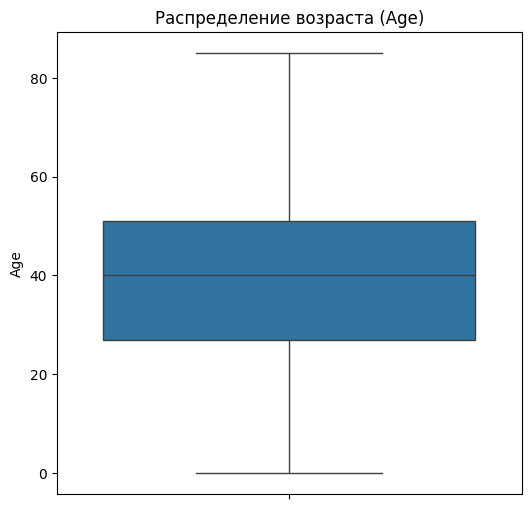

In [84]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Age'])
plt.title("Распределение возраста (Age)")

plt.show()

Генерация новых признаков


In [85]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Date
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3.0,...,4,3.0,4.0,4,5,5,25,18.0,neutral or dissatisfied,2022-10-20
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3.0,...,1,5.0,3.0,1,4,1,1,6.0,neutral or dissatisfied,2022-10-08
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2.0,...,4,3.0,4.0,4,4,5,0,0.0,satisfied,2022-10-11
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5.0,...,2,5.0,3.0,1,4,2,11,9.0,neutral or dissatisfied,2022-10-25
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3.0,...,3,4.0,4.0,3,3,3,0,0.0,satisfied,2022-10-23


In [87]:
df.insert(25, "Weekday", None)

In [88]:
df["Weekday"] = df["Date"].dt.weekday
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Date,Weekday
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3.0,...,3.0,4.0,4,5,5,25,18.0,neutral or dissatisfied,2022-10-20,3
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3.0,...,5.0,3.0,1,4,1,1,6.0,neutral or dissatisfied,2022-10-08,5
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2.0,...,3.0,4.0,4,4,5,0,0.0,satisfied,2022-10-11,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5.0,...,5.0,3.0,1,4,2,11,9.0,neutral or dissatisfied,2022-10-25,1
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3.0,...,4.0,4.0,3,3,3,0,0.0,satisfied,2022-10-23,6


In [89]:
Flights_per_weekday = (
    df.groupby("Weekday")["id"]
      .count()
      .reset_index())

In [90]:
Flights_per_weekday

,Weekday,id
0,0,16471
1,1,16350
2,2,13103
3,3,12837
4,4,12906
5,5,16014
6,6,16222


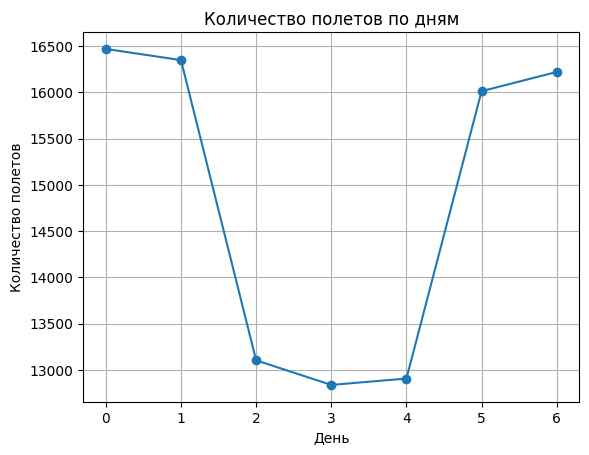

In [91]:
plt.figure()
plt.plot(Flights_per_weekday["Weekday"],
         Flights_per_weekday["id"],
         marker="o")

plt.title("Количество полетов по дням")
plt.xlabel("День")
plt.ylabel("Количество полетов")
plt.grid(True)
plt.show()

In [92]:
Customer_loyalty_comparison = (
    df.groupby("Customer Type")["id"]
      .count()
      .reset_index())
Customer_loyalty_comparison

,Customer Type,id
0,Disloyal Customer,215
1,Loyal Customer,84737
2,disloyal Customer,18951


In [93]:
df["Customer Type"] = df["Customer Type"].replace(["disloyal Customer"], ["Disloyal Customer"])

In [94]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Date,Weekday
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3.0,...,3.0,4.0,4,5,5,25,18.0,neutral or dissatisfied,2022-10-20,3
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3.0,...,5.0,3.0,1,4,1,1,6.0,neutral or dissatisfied,2022-10-08,5
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2.0,...,3.0,4.0,4,4,5,0,0.0,satisfied,2022-10-11,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5.0,...,5.0,3.0,1,4,2,11,9.0,neutral or dissatisfied,2022-10-25,1
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3.0,...,4.0,4.0,3,3,3,0,0.0,satisfied,2022-10-23,6


In [95]:
Customer_loyalty_comparison = (
    df.groupby("Customer Type")["id"]
      .count()
      .reset_index())
Customer_loyalty_comparison

,Customer Type,id
0,Disloyal Customer,19166
1,Loyal Customer,84737


Text(0.5, 1.0, 'Соотношение Loyal и Disloyal клиентов')

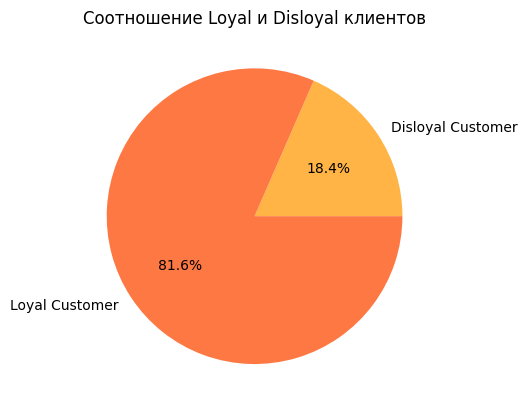

In [96]:
colors_list = ['#ffb445', '#fe7843', '#ed4e92', '#8762ca']
plt.pie(Customer_loyalty_comparison["id"],
         labels=Customer_loyalty_comparison["Customer Type"],
         autopct='%1.1f%%',
         colors=colors_list)
plt.title("Соотношение Loyal и Disloyal клиентов")

In [97]:
df["Class"] = df["Class"].replace(["Busines"], ["Business"])

In [98]:
Class_relation = (
    df.groupby("Class")["id"]
      .count()
      .reset_index())
Class_relation

,Class,id
0,Business,49653
1,Eco,46737
2,Eco Plus,7493
3,Econom,20


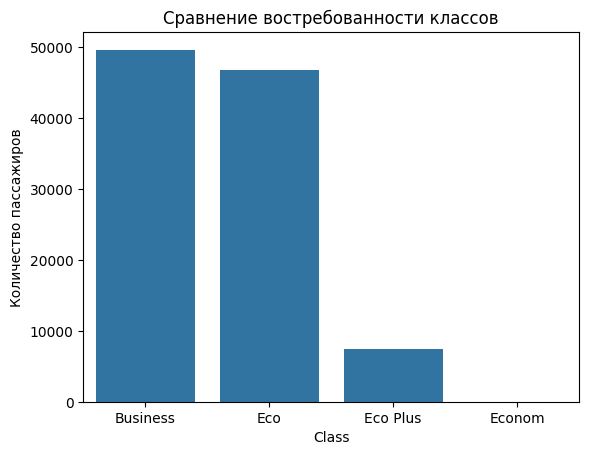

In [99]:
plt.figure()
sns.barplot(x=Class_relation.Class, y=Class_relation.id)
plt.title("Сравнение востребованности классов")
plt.ylabel("Количество пассажиров")
plt.show()

In [100]:
Travel_type_relation = (
    df.groupby("Type of Travel")["id"]
      .count()
      .reset_index())
Travel_type_relation

,Type of Travel,id
0,Business travel,71653
1,Personal Travel,32250


In [101]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle_Aged', 'Senior'])

In [102]:
Age_distribution = (
    df.groupby("Age_Group")["id"]
      .count()
      .reset_index())
Age_distribution

/var/folders/zs/th7t891d5gb13xl22_k4pyt00000gn/T/ipykernel_13774/3878866304.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["id"]


,Age_Group,id
0,Young,22640
1,Adult,43381
2,Middle_Aged,33873
3,Senior,4005


Text(0.5, 1.0, 'Соотношение клиентов разных возрастных групп')

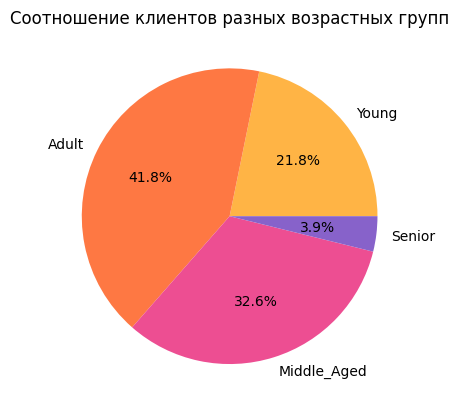

In [103]:
colors_list = ['#ffb445', '#fe7843', '#ed4e92', '#8762ca']
plt.pie(Age_distribution["id"],
         labels=Age_distribution["Age_Group"],
         autopct='%1.1f%%',
         colors=colors_list)
plt.title("Соотношение клиентов разных возрастных групп")

Несмотря на относительно небольшое количество столбцов с нулевыми значениями, данные не очень чистые. Есть повторения по значениям записанным разным регистром или с ошибками, это тоже нужно было почистить для более точной картины.